<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Cardiovascular-risk-prediction./blob/main/Copy_of_Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INDRODUCTION
* Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. According to the WHO, an estimated 17.9 million people died from heart disease in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

* The silver lining is that heart attacks are highly preventable and simple lifestyle modifications(such as reducing alcohol and tobacco use; eating healthily and exercising) coupled with early treatment greatly improves its prognosis. It is, however, difficult to identify high risk patients because of the multi-factorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, et cetera. This is where machine learning and data mining come to the rescue.

* Doctors and scientists alike have turned to machine learning (ML) techniques to develop screening tools and this is because of their superiority in pattern recognition and classification as compared to other traditional statistical approaches.

* **In this project, I will be giving you a walk through on the development of a screening tool for predicting whether a patient has 10-year risk of developing coronary heart disease(CHD) using different *Classification* Machine Learning techniques**
* *Classification is a technique where we categorize data into given number of class.The main goal of a classification problem is to identify the category/class to which a new data will fall under.*

### **Cardiovascular Risk Prediction**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


---




# **Important Libraries**

In [ ]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



**Data Acquisition**

In [ ]:
fl="/content/drive/MyDrive/Alma better Projects/Cardio Classificatio ML-Supervised/Copy of data_cardiovascular_risk.csv"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Creating Dataframes from csv files
df=pd.read_csv(fl)

#Undestanding Dataset

In [ ]:
#Shape
df.shape

(3390, 17)

Our dataset contains 3390 rows and 17 columns.

In [ ]:
#To see the first 10 rows of the dataset
display(df.head(),df.tail())

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


Variables :
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

**Demographic:** gender: male or female;(Nominal)

* age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioural**

* currentSmoker: whether or not the patient is a current smoker (Nominal)

* cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

**Medical( history):**

* BPMeds: whether or not the patient was on blood pressure medication (Nominal)

* prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

* prevalentHyp: whether or not the patient was hypertensive (Nominal)

* diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current):**

* totChol: total cholesterol level (Continuous)

* sysBP: systolic blood pressure (Continuous)

* diaBP: diastolic blood pressure (Continuous)

* BMI: Body Mass Index (Continuous)

* heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

* glucose: glucose level (Continuous)

**Predict variable (desired target):**

* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

**Statistical Summary**

In [ ]:
#Descriptions
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Overview of dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Aim:- For the Given problem statement we have to build a Predictive Model which will give early detections of heart disease.



#Feature Engineering

In [ ]:
#set id as index
df.set_index('id',inplace=True)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


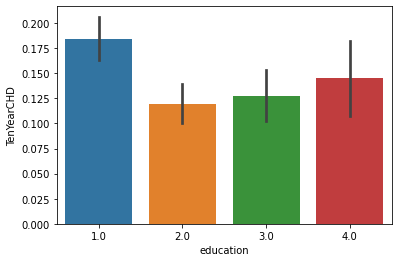

In [ ]:
df["education"].fillna(df["education"].mode(),inplace=True)
ax = sns.barplot(x="education", y="TenYearCHD", data=df)

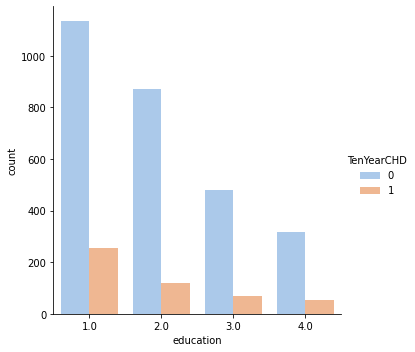

In [ ]:
sns.catplot(data=Cardiovascular_risk_df,kind='count',x='education',hue='TenYearCHD',palette='pastel')
plt.show()

**Observation**
* we Dont have any concrete defination for the values in education feature.
* we will try feature selection using ci-square and identify if we need this feature or not. 

**Missing values**

In [ ]:
#To check for missing values
Cardiovascular_risk_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Fields like education,cigsPerDay,BPMeds,totChol,glucose are having missing values.

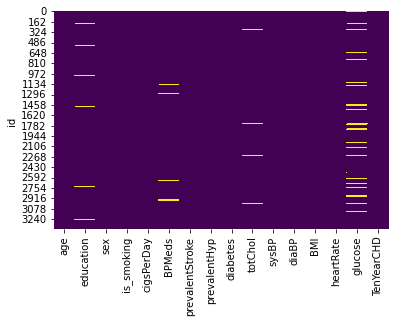

In [ ]:
#Heatmap for missing values
sns.heatmap(Cardiovascular_risk_df.isnull(),cbar=False,cmap='viridis')
plt.show()

In [ ]:
#education,cigsPerDay,BPMeds,totChol,glucose 
Cardiovascular_risk_df['glucose'] = Cardiovascular_risk_df['glucose'].fillna(Cardiovascular_risk_df['glucose'].median())
Cardiovascular_risk_df['heartRate'] = Cardiovascular_risk_df['heartRate'].fillna(Cardiovascular_risk_df['heartRate'].mode()[0])
Cardiovascular_risk_df['cigsPerDay'] = Cardiovascular_risk_df['cigsPerDay'].fillna(Cardiovascular_risk_df['cigsPerDay'].mean()) 
Cardiovascular_risk_df['totChol'] = Cardiovascular_risk_df['totChol'].fillna(Cardiovascular_risk_df['totChol'].median())
Cardiovascular_risk_df['BMI'] = Cardiovascular_risk_df['BMI'].fillna(Cardiovascular_risk_df['BMI'].median())
Cardiovascular_risk_df['BPMeds'] = Cardiovascular_risk_df['BPMeds'].fillna(Cardiovascular_risk_df['BPMeds'].mode()[0])
Cardiovascular_risk_df['education'] = Cardiovascular_risk_df['education'].fillna(Cardiovascular_risk_df['education'].mode()[0])
# Cardiovascular_risk_df.drop(['education'],axis=1,inplace=True)

In [ ]:
Cardiovascular_risk_df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Outliers**

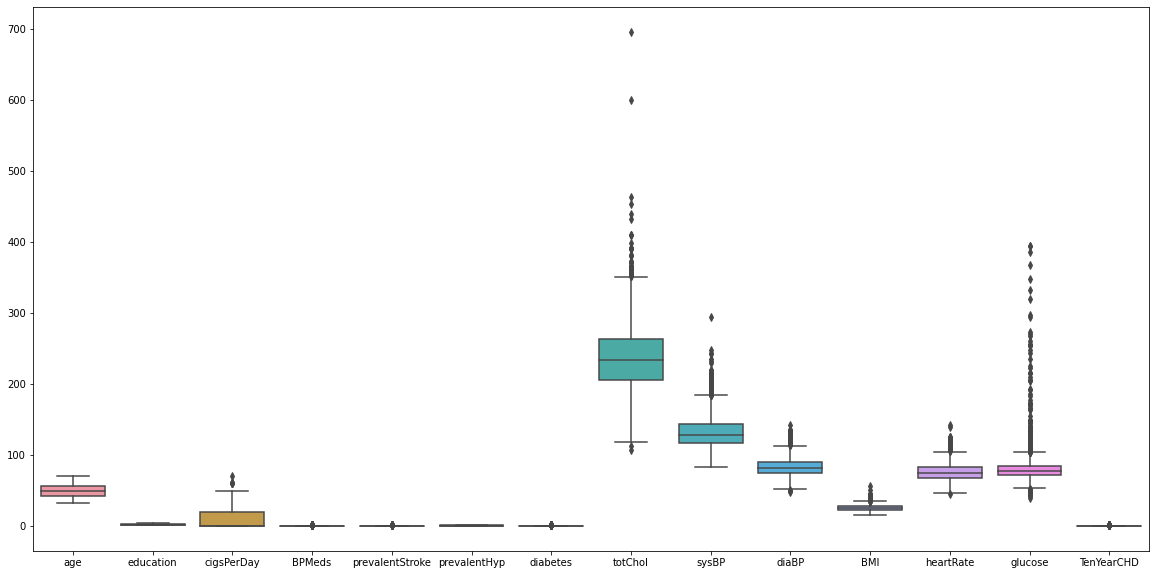

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=Cardiovascular_risk_df)
plt.show()

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
print('cigsPerDay')
out_iqr(Cardiovascular_risk_df,'cigsPerDay')
print('totChol')
out_iqr(Cardiovascular_risk_df,'totChol')
print('sysBP')
out_iqr(Cardiovascular_risk_df,'sysBP')
print('diaBP')
out_iqr(Cardiovascular_risk_df,'diaBP')
print('BMI')
out_iqr(Cardiovascular_risk_df,'BMI')
print('heartRate')
out_iqr(Cardiovascular_risk_df,'heartRate')
print('glucose')
out_iqr(Cardiovascular_risk_df,'glucose')

cigsPerDay
The IQR is 20.0
The lower bound value is -30.0
The upper bound value is 50.0
Total number of outliers are 9
totChol
The IQR is 58.0
The lower bound value is 119.0
The upper bound value is 351.0
Total number of outliers are 43
sysBP
The IQR is 27.0
The lower bound value is 76.5
The upper bound value is 184.5
Total number of outliers are 105
diaBP
The IQR is 15.5
The lower bound value is 51.25
The upper bound value is 113.25
Total number of outliers are 58
BMI
The IQR is 4.967499999999998
The lower bound value is 15.578750000000005
The upper bound value is 35.44875
Total number of outliers are 79
heartRate
The IQR is 15.0
The lower bound value is 45.5
The upper bound value is 105.5
Total number of outliers are 64
glucose
The IQR is 13.0
The lower bound value is 52.5
The upper bound value is 104.5
Total number of outliers are 214


**Imputing Outliers**
* We already have less data in our data set. hence we will Impute the outliers rathers deleting them.

In [ ]:
def Impute_outliers(df , column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    # calculate the IQR
    iqr = q3 - q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[column])
    for i in df[column]:
       if i > Upper_tail:
          df[column] = df[column].replace(i, med)
    return 
# Lower_tail = q1 - 1.5 * iqr
# Upper_tail = q3 + 1.5 * iqr
  #  med = np.median(df[column])
  #  for i in df[column]:
  #    if i > upper or i < lower:
  #            df[column] = df[column].replace(i, med)


In [ ]:
Cardiovascular_risk_df["cigsPerDay"].value_counts()

0.000000     1703
20.000000     606
30.000000     176
15.000000     172
10.000000     106
9.000000      104
5.000000      103
3.000000       79
40.000000      62
1.000000       48
25.000000      44
43.000000      42
9.069477       22
35.000000      17
2.000000       17
6.000000       14
8.000000       10
7.000000        8
60.000000       8
18.000000       7
4.000000        7
50.000000       6
17.000000       5
23.000000       5
11.000000       4
12.000000       3
13.000000       3
19.000000       2
16.000000       2
45.000000       2
14.000000       1
70.000000       1
38.000000       1
Name: cigsPerDay, dtype: int64

In [ ]:
Cardiovascular_risk_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
Impute_outliers(Cardiovascular_risk_df,'cigsPerDay')
Impute_outliers(Cardiovascular_risk_df,'totChol')
Impute_outliers(Cardiovascular_risk_df,'sysBP')
Impute_outliers(Cardiovascular_risk_df,'diaBP')
Impute_outliers(Cardiovascular_risk_df,'BMI')
Impute_outliers(Cardiovascular_risk_df,'heartRate')
Impute_outliers(Cardiovascular_risk_df,'glucose')





In [ ]:
print("Maximum Cholestrol:-",Cardiovascular_risk_df['totChol'].max())
print("maximun Blood pressure:-",Cardiovascular_risk_df['sysBP'].max())
print("Maximum Cigrates per Day:-",Cardiovascular_risk_df['cigsPerDay'].max())

Maximum Cholestrol:- 351.0
maximun Blood pressure:- 184.5
Maximum Cigrates per Day:- 50.0


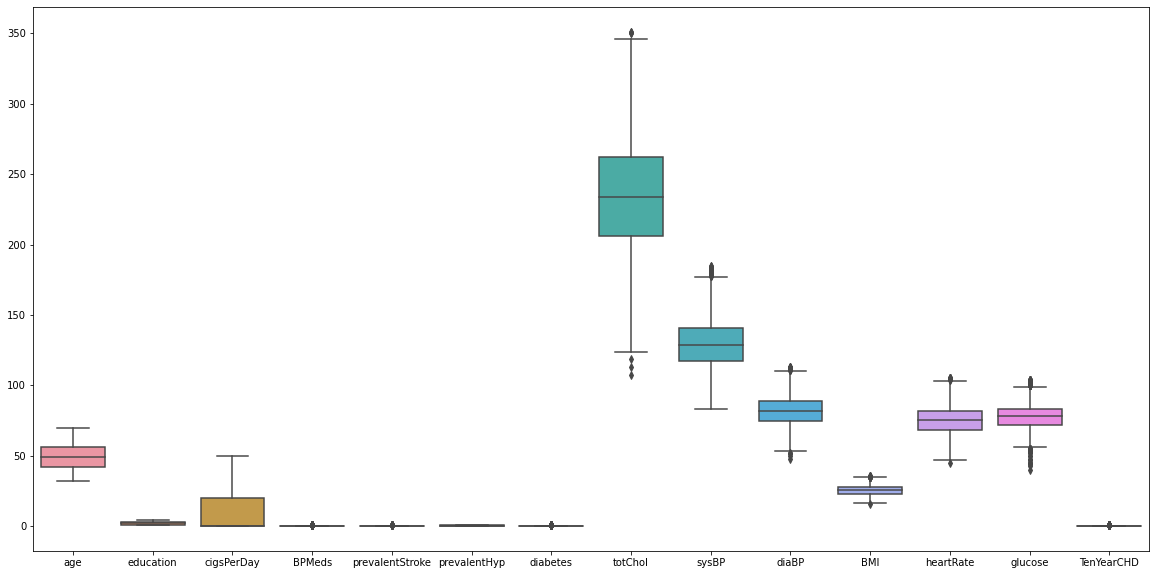

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=Cardiovascular_risk_df)
plt.show()

**Duplicate Values**

In [ ]:
Cardiovascular_risk_df.duplicated().sum()

0

# Explorartory Data Analysis

In [ ]:
Cardiovascular_risk_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64



* **Target Variable**



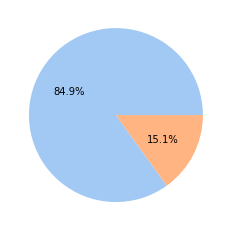

In [ ]:
#data=Cardiovascular_risk_df['TenYearCHD']
colors=sns.color_palette('pastel')[0:5]
plt.pie(Cardiovascular_risk_df["TenYearCHD"].value_counts(),autopct="%1.1f%%",colors=colors)
plt.show()



Conclusion:
The distribution of target variable is highly imbalanced.This will lead problem in fitting of models.Therefore this problem should be handled.

## **1.Univariate Analysis**



*  **Categorical Features**



In [ ]:
categorical_features=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(Cardiovascular_risk_df[feature].value_counts())
    print("========================")


sex :
F    1923
M    1467
Name: sex, dtype: int64
is_smoking :
NO     1703
YES    1687
Name: is_smoking, dtype: int64
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64


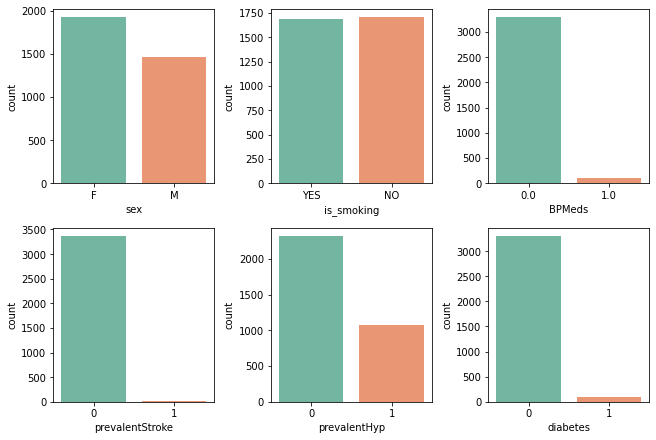

In [ ]:
num_plots = len(categorical_features)
total_cols = 3
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(3*total_cols, 3*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Cardiovascular_risk_df,ax=axs[row][pos],palette='Set2')
  

Conclusion:


*   BPmeds, prevalentStroke and diabetes are highly imbalanced.
* The number of Smokers and non-Smokers in is_smoking is almost the same.






* **Numerical Variables**




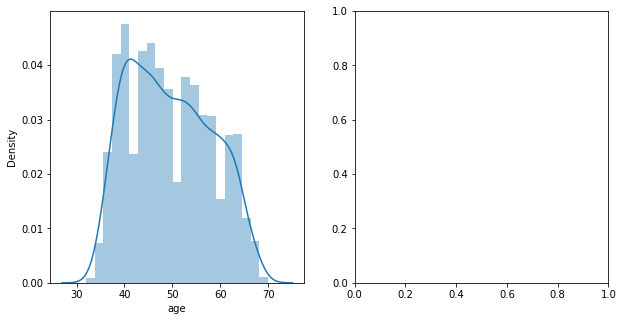

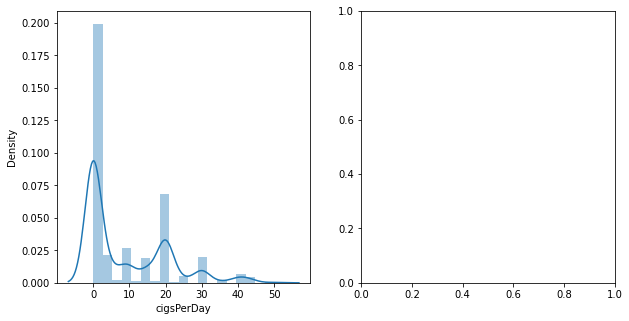

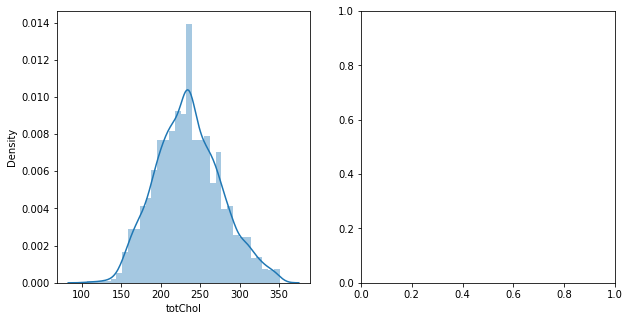

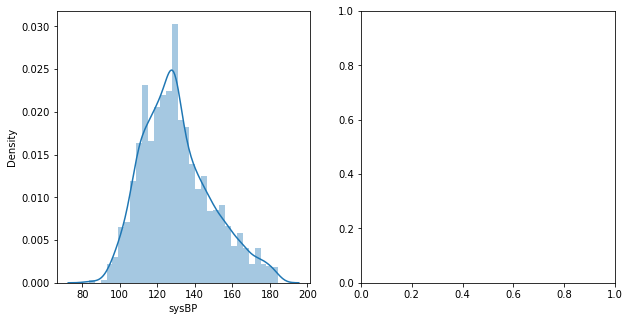

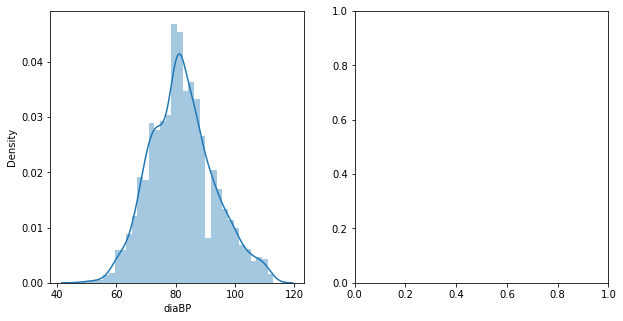

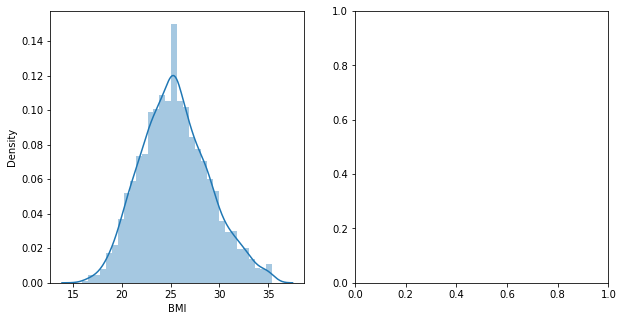

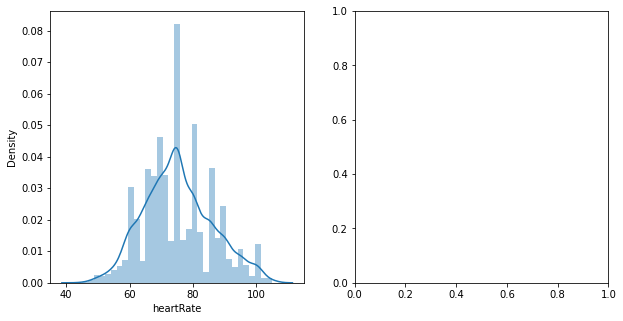

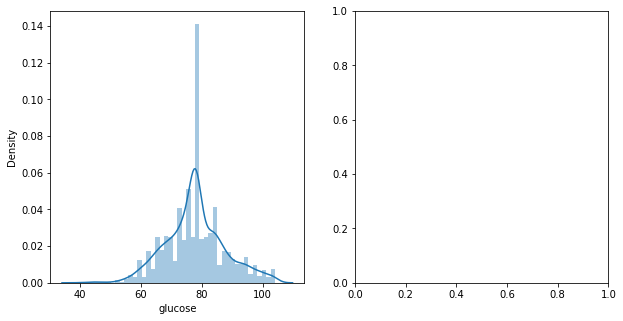

In [ ]:
numeric_features = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for feature in numeric_features:
  fig = plt.figure(figsize=(10,5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  sns.distplot(Cardiovascular_risk_df[feature],hist = True,label='skewness:{:.2f}'.format(Cardiovascular_risk_df[feature].skew()),ax = ax1)
  # g1.legend()

  
  plt.show() 
  


Conclusion:
 

*  totChol,sysBP,diaBP,BMI have uniform distribution while heartRate, glucose and cigsPerDay are unevenly distributed.
*   cigsPerDay and sysBP are slightly right skewed.


*  cigsPerDay has most data present in 0 as well as it is highly unevenly distributed. 
*   Heartrate also has highly uneven distribution most data is present around 80. 





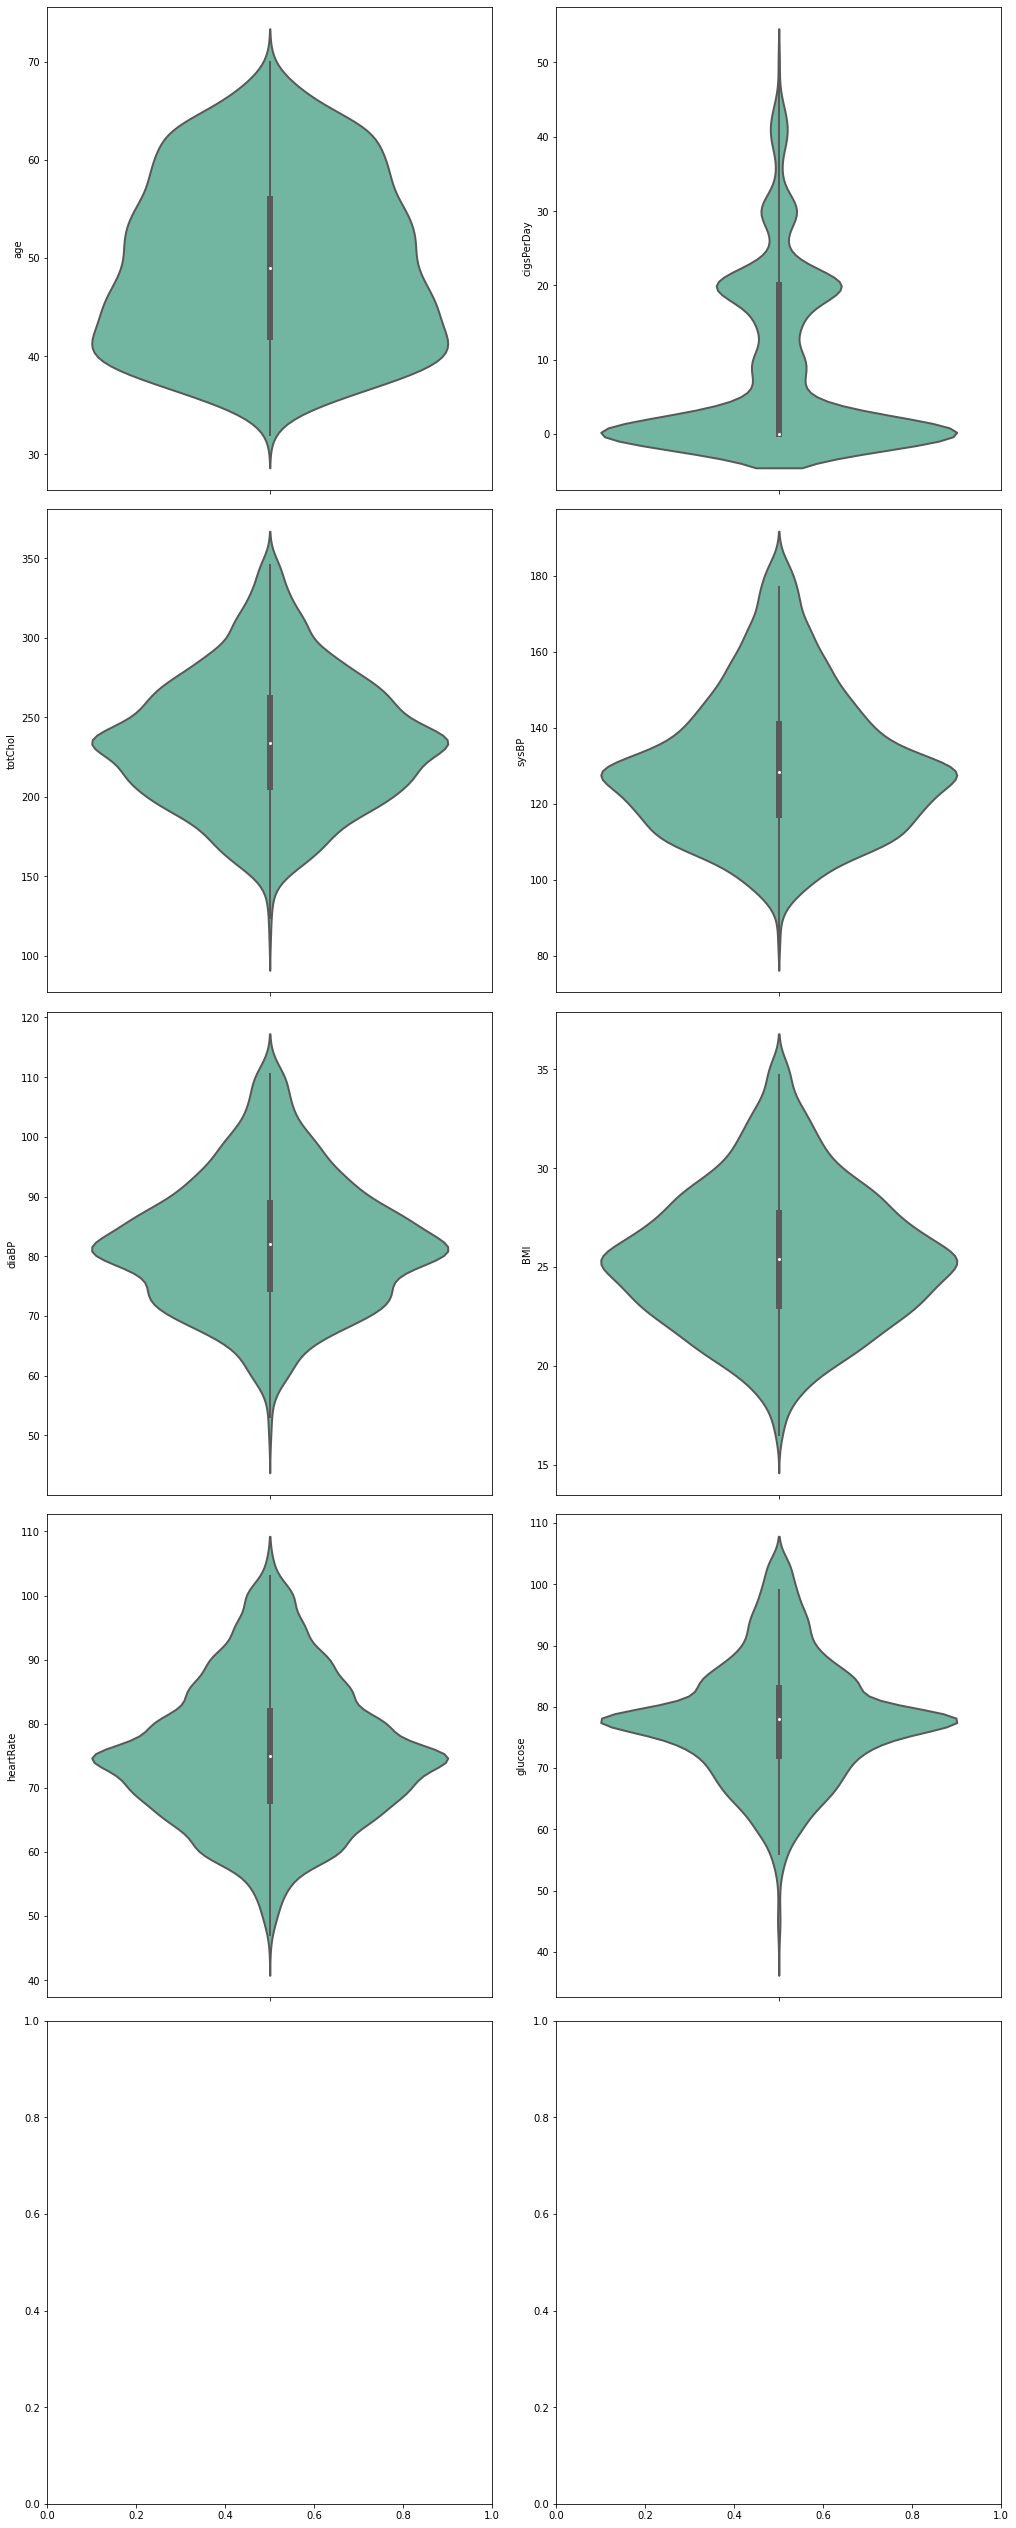

In [ ]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=Cardiovascular_risk_df, ax=axs[row][pos], linewidth=2,palette='Set2')


## **2.Bivariate Analysis**





* **Countplot of people who is smoking or not according to the gender.**




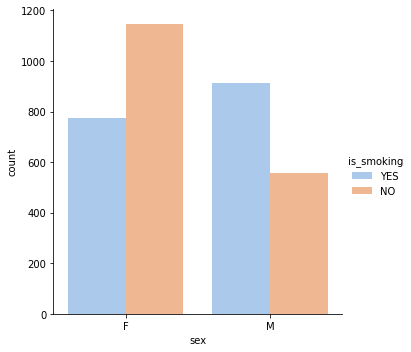

In [ ]:
sns.catplot(data=Cardiovascular_risk_df,kind='count',x='sex',hue='is_smoking',palette='pastel')
plt.show()

Conclusion:
Males smokes more compared to female.



* **No of people affecting with CHD on the basis of their sex**




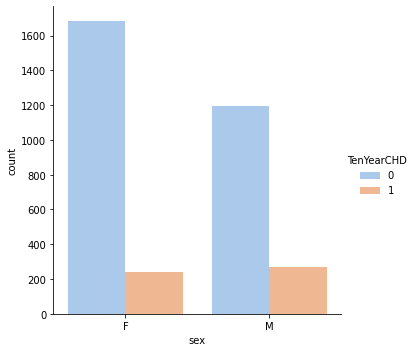

In [ ]:
sns.catplot(data=Cardiovascular_risk_df,kind='count',x='sex',hue='TenYearCHD',palette='pastel')
plt.show()

**Conclusion:**Females have less chances of getting CHD than males.



*  **Chances of getting CHD according to age**



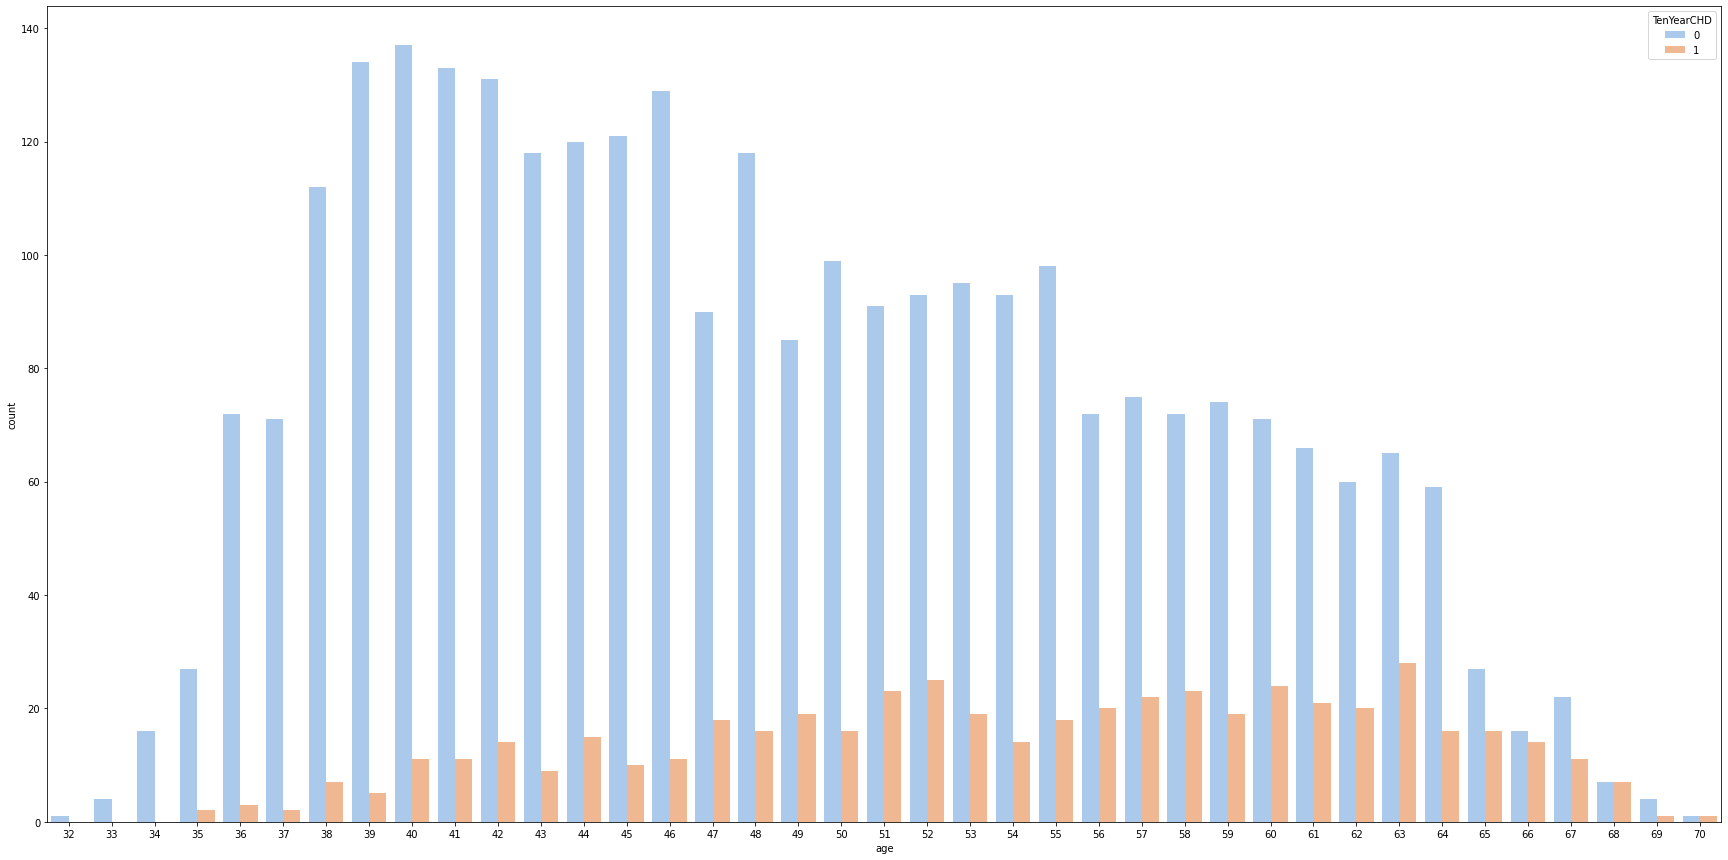

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data=Cardiovascular_risk_df,x='age',hue='TenYearCHD',palette='pastel')
plt.show()

**Conclusion:**

Chances of getting CHD are mostly among the age group 35-50.

While age group below 35 has lowest chances of getting CHD. 



* **Relation between sysBP and risk of CHD **



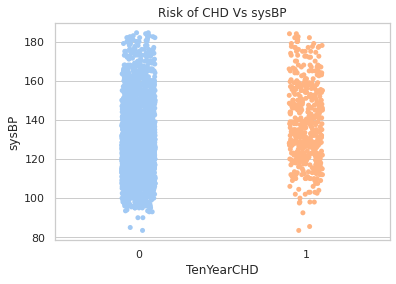

In [ ]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='TenYearCHD',y='sysBP',data=Cardiovascular_risk_df,palette='pastel')
plt.title('Risk of CHD Vs sysBP')
plt.show()





* **Relation between diaBP and risk of TenYearCHD**



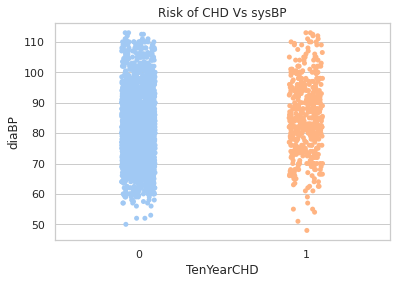

In [ ]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='TenYearCHD',y='diaBP',data=Cardiovascular_risk_df,palette='pastel')
plt.title('Risk of CHD Vs sysBP')
plt.show()

## **3.Multivariate Analysis**

Relationship between Age,cigsPerDay and TenYearCHD

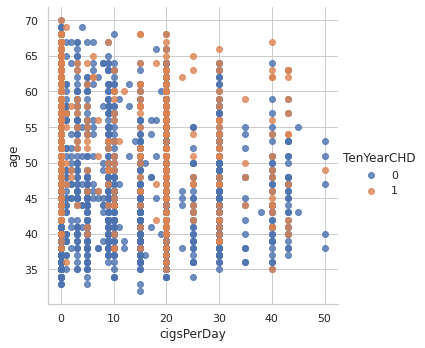

In [ ]:
sns.lmplot(x='cigsPerDay',y='age',hue='TenYearCHD',data=Cardiovascular_risk_df,fit_reg=False)
plt.show()

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

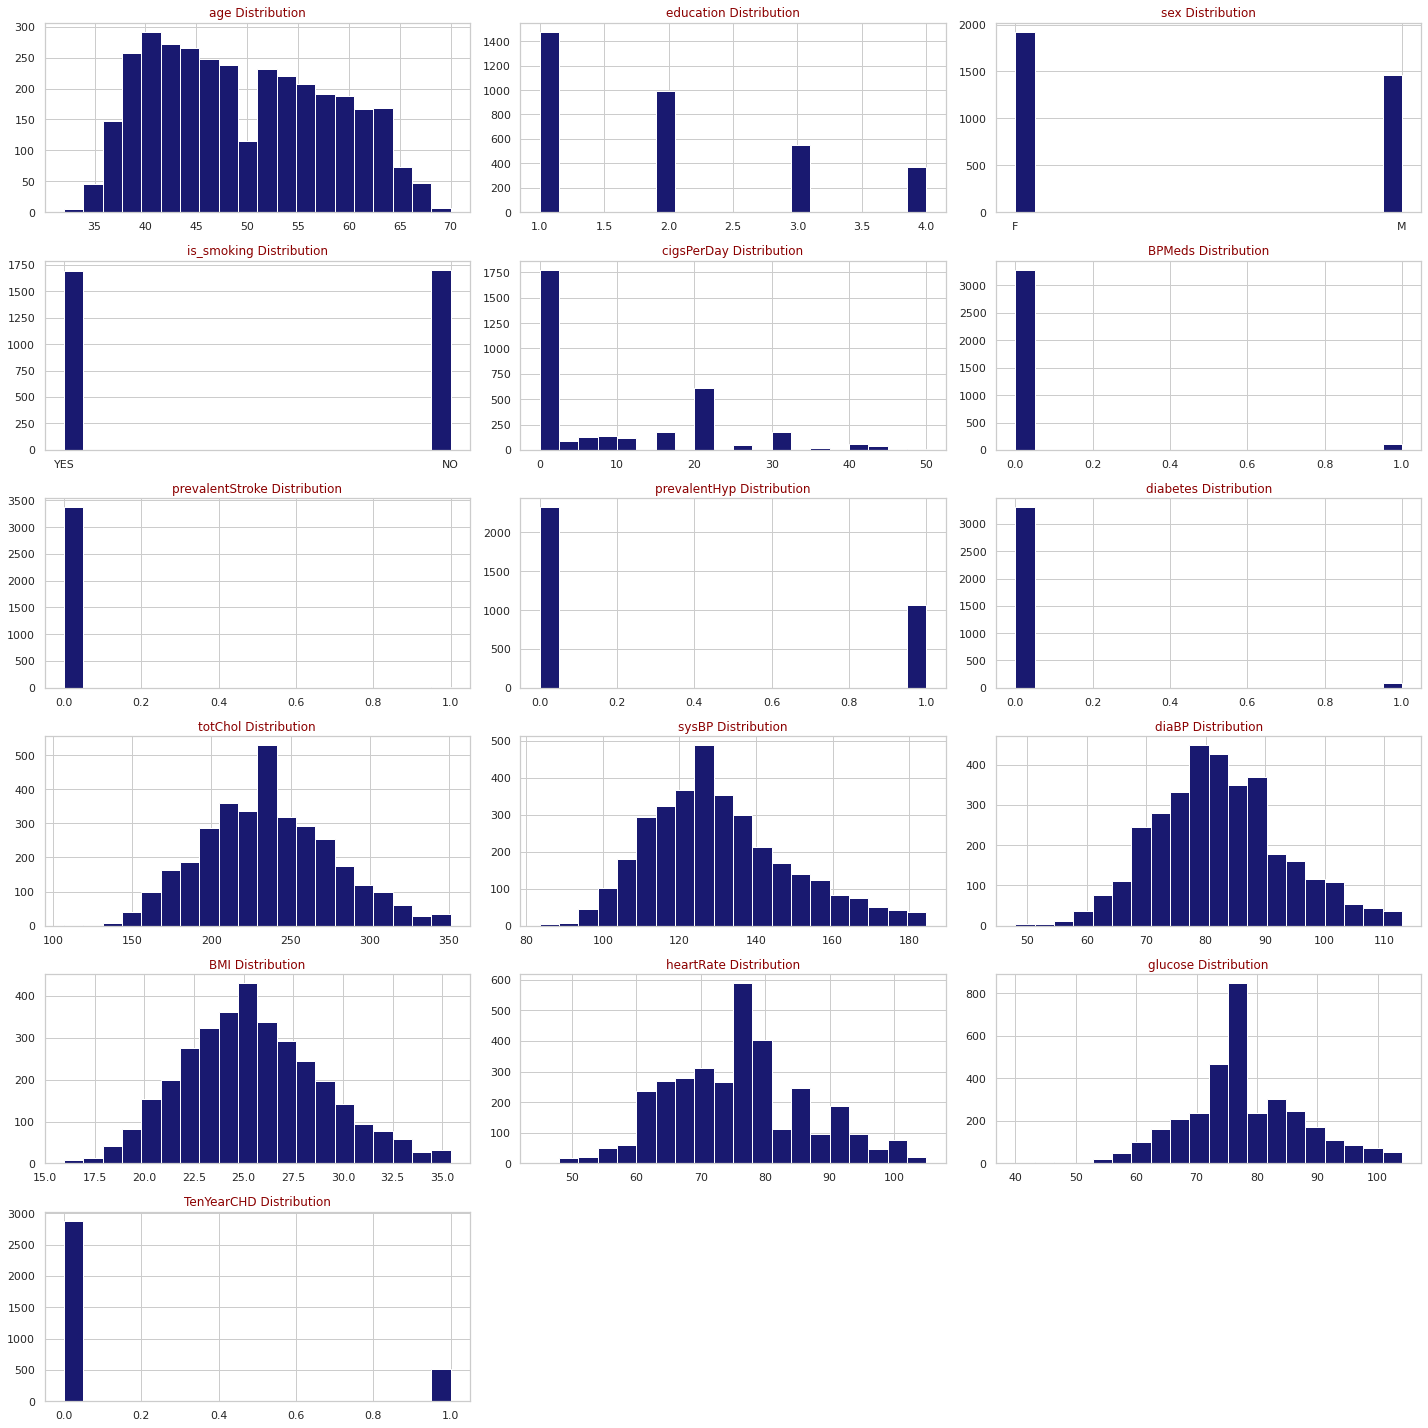

In [ ]:
draw_histograms(Cardiovascular_risk_df,Cardiovascular_risk_df,6,3)

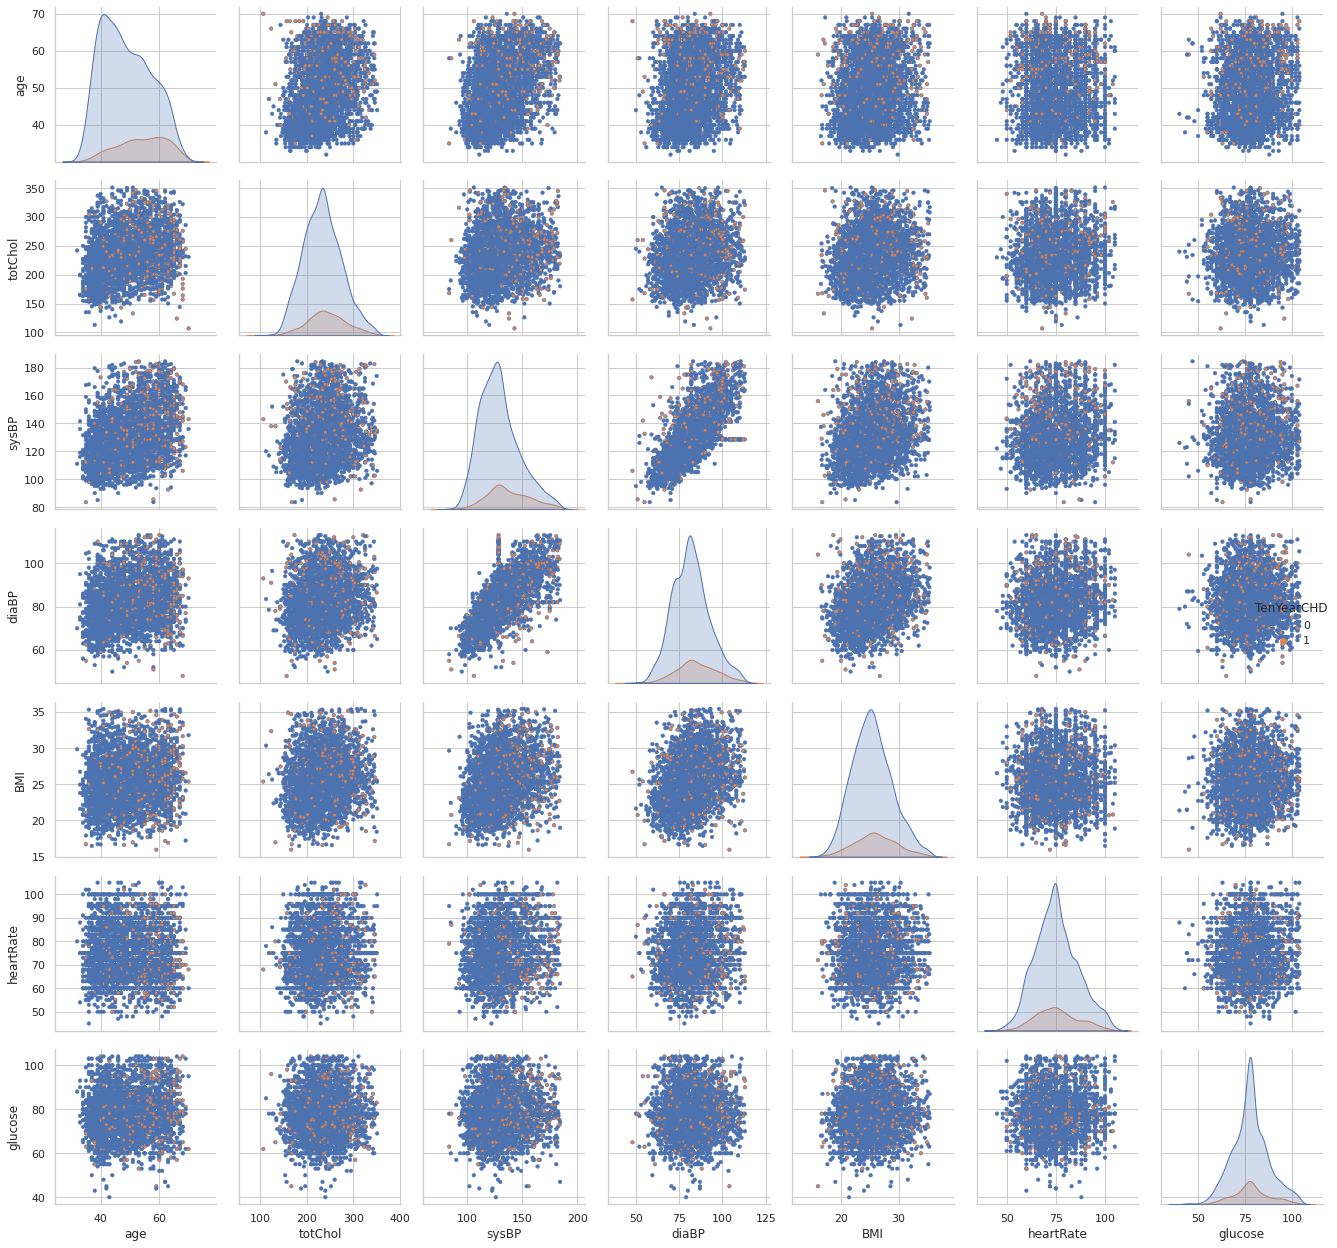

In [ ]:

sns.pairplot(data=Cardiovascular_risk_df,height=2.5,
             diag_kind="kde", 
             markers=".",
             plot_kws=dict(s=50, edgecolor="b"),
             hue='TenYearCHD',
             vars=['age','totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
                   diag_kws=dict(shade=True))

plt.tight_layout()
plt.show() 

# **Label Encoding**

In [ ]:
Cardiovascular_risk_df.age.unique()

array([64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35,
       54, 62, 47, 34, 39, 59, 45, 49, 60, 40, 52, 48, 37, 65, 57, 68, 67,
       33, 66, 69, 70, 32])

In [ ]:
bins = [30, 40, 50, 60,70]
names = [35,45,55,65]
Cardiovascular_risk_df[''] = pd.cut(transport_demand_df.Boarding_time, bins, labels=names)
transport_demand_df.drop(["Boarding_time"],axis=1,inplace=True)

In [ ]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
categ=['sex','is_smoking']

#Encode Categorical columns
le=LabelEncoder()
Cardiovascular_risk_df[categ]=Cardiovascular_risk_df[categ].apply(le.fit_transform)

In [ ]:
Cardiovascular_risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


We performed label encoding on sex and is_smoking columns as they contain only two output values.

## **Feature Selection**

**Feature selection**

Feature selection or variable selection is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.

**Advantages of selecting features**

There are various advantages of feature selection process. These are as follows:-

* Improved accuracy
* Simple models are easier to interpret.
* Shorter training times
* Enhanced generalization by reducing Overfitting
* Easier to implement by software developers
* Reduced risk of data errors by model use
* Variable redundancy
* Bad learning behaviour in high dimensional spaces



**1.Correlation-Matrix with Heatmap** 

* Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

* Good variables are highly correlated with the target.

* Correlated predictor variables provide redundant information.

* Variables should be correlated with the target but uncorrelated among themselves.

**Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis:**

* "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

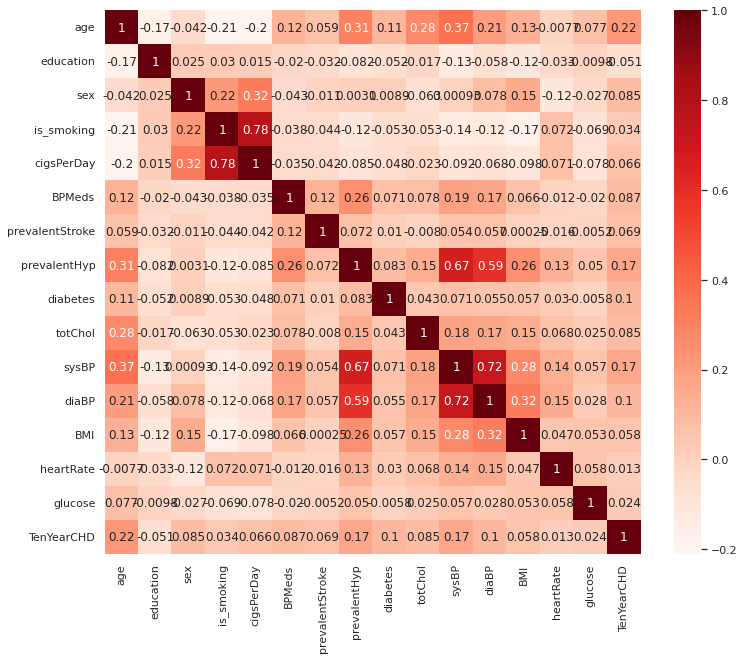

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor =Cardiovascular_risk_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
Cardiovascular_risk_df.drop(['is_smoking'],axis=1,inplace=True)
Cardiovascular_risk_df.drop(['sysBP'],axis=1,inplace=True)

Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. This is done to avoid overfitting.

# **Feature Splitting and Scaling**

In [ ]:
y = Cardiovascular_risk_df['TenYearCHD']
X = Cardiovascular_risk_df.drop(['TenYearCHD'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


**2.Basic Methode for feature selection**
* **Remove quasi-constant features Using variance threshold from sklearn**
 * Variance threshold from sklearn is a simple baseline approach to feature selection. 
 * It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [ ]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
# 0.1 indicates 99% of observations approximately
sel = VarianceThreshold(threshold=0.1)
# fit finds the features with zero variance
sel.fit(X_train)  

VarianceThreshold(threshold=0.1)

In [ ]:
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

['BPMeds', 'prevalentStroke', 'diabetes']

* We can see that > 99% of the observations show one value, 0. Therefore, this feature is almost constant.

**Ci-Square tset**

In [ ]:
from sklearn.feature_selection import chi2
X = Cardiovascular_risk_df.drop(['age','totChol','diaBP','BMI','heartRate','TenYearCHD','glucose'],axis=1)
y = Cardiovascular_risk_df['TenYearCHD']

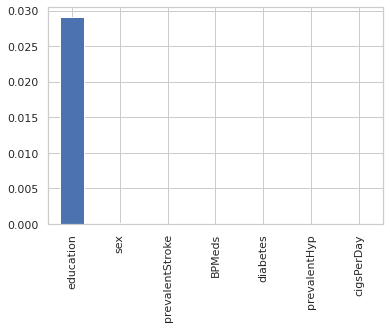

In [ ]:
chi_scores = chi2(X,y)
chi_scores
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
plt.show()

**Since education has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training**

In [ ]:
#Removing  sorted feature
X = Cardiovascular_risk_df.drop(['TenYearCHD','education','BPMeds', 'prevalentStroke', 'diabetes'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.columns

Index(['age', 'sex', 'cigsPerDay', 'prevalentHyp', 'totChol', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

**Sacling independind features**

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)


#**Balancing Target Variable**

**Over-sampling: SMOTE**
* SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

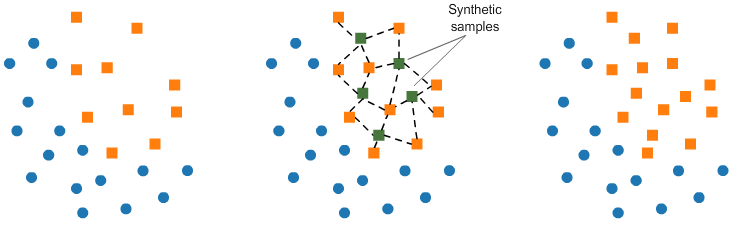

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 414
Before OverSampling, counts of label '0': 2298 

After OverSampling, the shape of train_X: (4596, 9)
After OverSampling, the shape of train_y: (4596,) 

After OverSampling, counts of label '1': 2298
After OverSampling, counts of label '0': 2298


# **Predictive Modeling**

### **Logistic Regression**
Logistic Regression utilizes the power of regression to do classification.
One of the main reasons for the model’s success is its power of explainability i.e. calling-out the contribution of individual predictors, quantitatively.Unlike regression which uses Least Squares, the model uses Maximum Likelihood to fit a sigmoid-curve on the target variable distribution.

confussion matrix
[[518  63]
 [ 66  31]]


Accuracy of Logistic Regression: 80.97345132743364 

Recall  31.958762886597935 

F1 Score 32.46073298429319 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       581
           1       0.33      0.32      0.32        97

    accuracy                           0.81       678
   macro avg       0.61      0.61      0.61       678
weighted avg       0.81      0.81      0.81       678



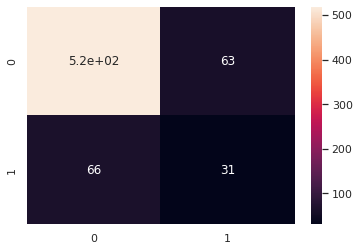

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1,C=1e5)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(test_x)
#confusion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
sns.heatmap(lr_conf_matrix, annot=True)
#Accuracy score
lr_acc_score = accuracy_score(y_test, lr_predict)
#Recall
lr_re_score=recall_score(y_test, lr_predict)
#F1 Score
lr_f1_score=f1_score(y_test,lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("Recall ",lr_re_score*100,"\n")
print("F1 Score",lr_f1_score*100,"\n")
print(classification_report(y_test,lr_predict))


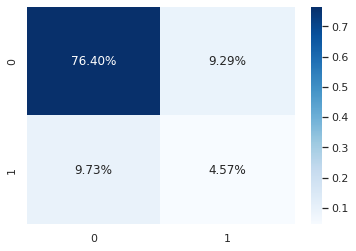

In [ ]:
# sns.heatmap(lr_conf_matrix, annot=True, cmap=plt.cm.Reds)

sns.heatmap(lr_conf_matrix/np.sum(lr_conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

**GridSearch over logitic regression with Hyper parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
parameters = dict(solver=solver_list,penalty=penalty,C=c_values)
lr = LogisticRegression(random_state=34, multi_class="auto", n_jobs=-1, C=1,max_iter=100)
clf = GridSearchCV(lr, parameters, cv=10)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=1, n_jobs=-1, random_state=34),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [ ]:
clf.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lr_hyper = LogisticRegression(random_state=1,C= 100, penalty= "l2", solver="newton-cg")
lr_hyper.fit(X_train, y_train)

lr_hyper_predict = lr_hyper.predict(test_x)
#confusion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_hyper_predict)
#Accuracy score
lr_hy_acc_score = accuracy_score(y_test, lr_hyper_predict)
#Recall
lr_hy_re_score=recall_score(y_test, lr_hyper_predict)
#F1 Score
lr_hy_f1_score=f1_score(y_test,lr_hyper_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("Recall ",lr_re_score*100,"\n")
print("F1 Score",lr_f1_score*100,"\n")
print(classification_report(y_test,lr_predict))

confussion matrix
[[581   0]
 [ 97   0]]


Accuracy of Logistic Regression: 80.97345132743364 

Recall  31.958762886597935 

F1 Score 32.46073298429319 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       581
           1       0.33      0.32      0.32        97

    accuracy                           0.81       678
   macro avg       0.61      0.61      0.61       678
weighted avg       0.81      0.81      0.81       678



In [ ]:
scores = clf.cv_results_['mean_test_score']
for score, solver, in zip(scores*100, solver_list):
    print(f"{solver}: {score:.3f}")
    # print(f"{solver}: {recall_score(y_test, lr_predict):.3f}")

sns.barplot(x=solver_list, y=scores*100). set_title("Wine Accuracy with Unscaled Features")  

liblinear: 84.883
newton-cg: 84.993
lbfgs: 84.698
sag: 84.624
saga: 84.661


KeyError: ignored

**Observation**

* All the solver algorithms giving approx same result

In [ ]:
tmp = lr.fit(X_train_res, y_train_res.ravel())

In [ ]:
# models


from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics





### KNN
K-Nearest Neighbor (KNN) algorithm predicts based on the specified number (k) of the nearest neighboring data points. Here, the pre-processing of the data is significant as it impacts the distance measurements directly. Unlike others, the model does not have a mathematical formula, neither any descriptive ability.

Here, the parameter ‘k’ needs to be chosen wisely; as a value lower than optimal leads to bias, whereas a higher value impacts prediction accuracy.

It is a simple, fairly accurate model preferable mostly for smaller datasets, owing to huge computations involved on the continuous predictors.**bold text**

In [ ]:
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_test_knn

In [ ]:
from sklearn.model_selection import GridSearchCV
#dictionary of Hyperparameters that we want to tune.
grid_params = {'n_neighbors' : [5,7,9,11,13,16],'p':[1,3,5,7,9],'leaf_size':[1,3,8,15,20],
    'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#Use GridSearch with KNN classifier
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [ ]:


knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(X_train, y_train)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn, knn.best_params_)

87.46 {'n_neighbors': 2}


In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


In [ ]:
# find the best score
g_res.best_score_
# get the hyperparameters with the best score
print("Best parameters:-",g_res.best_params_)


Best parameters:- {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}


In [ ]:
# get the hyperparameters with the best score
print(g_res.best_params_

SyntaxError: ignored

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5,leaf_size=1,p=3 ,weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

### **Decision Tree**

In [ ]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
#Recall
lr_re_score=recall_score(y_test, lr_predict)
#F1 Score
lr_f1_score=f1_score(y_test,lr_predict)

print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[485  96]
 [ 74  23]]


Accuracy of DecisionTreeClassifier: 74.92625368731564 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       581
           1       0.19      0.24      0.21        97

    accuracy                           0.75       678
   macro avg       0.53      0.54      0.53       678
weighted avg       0.77      0.75      0.76       678



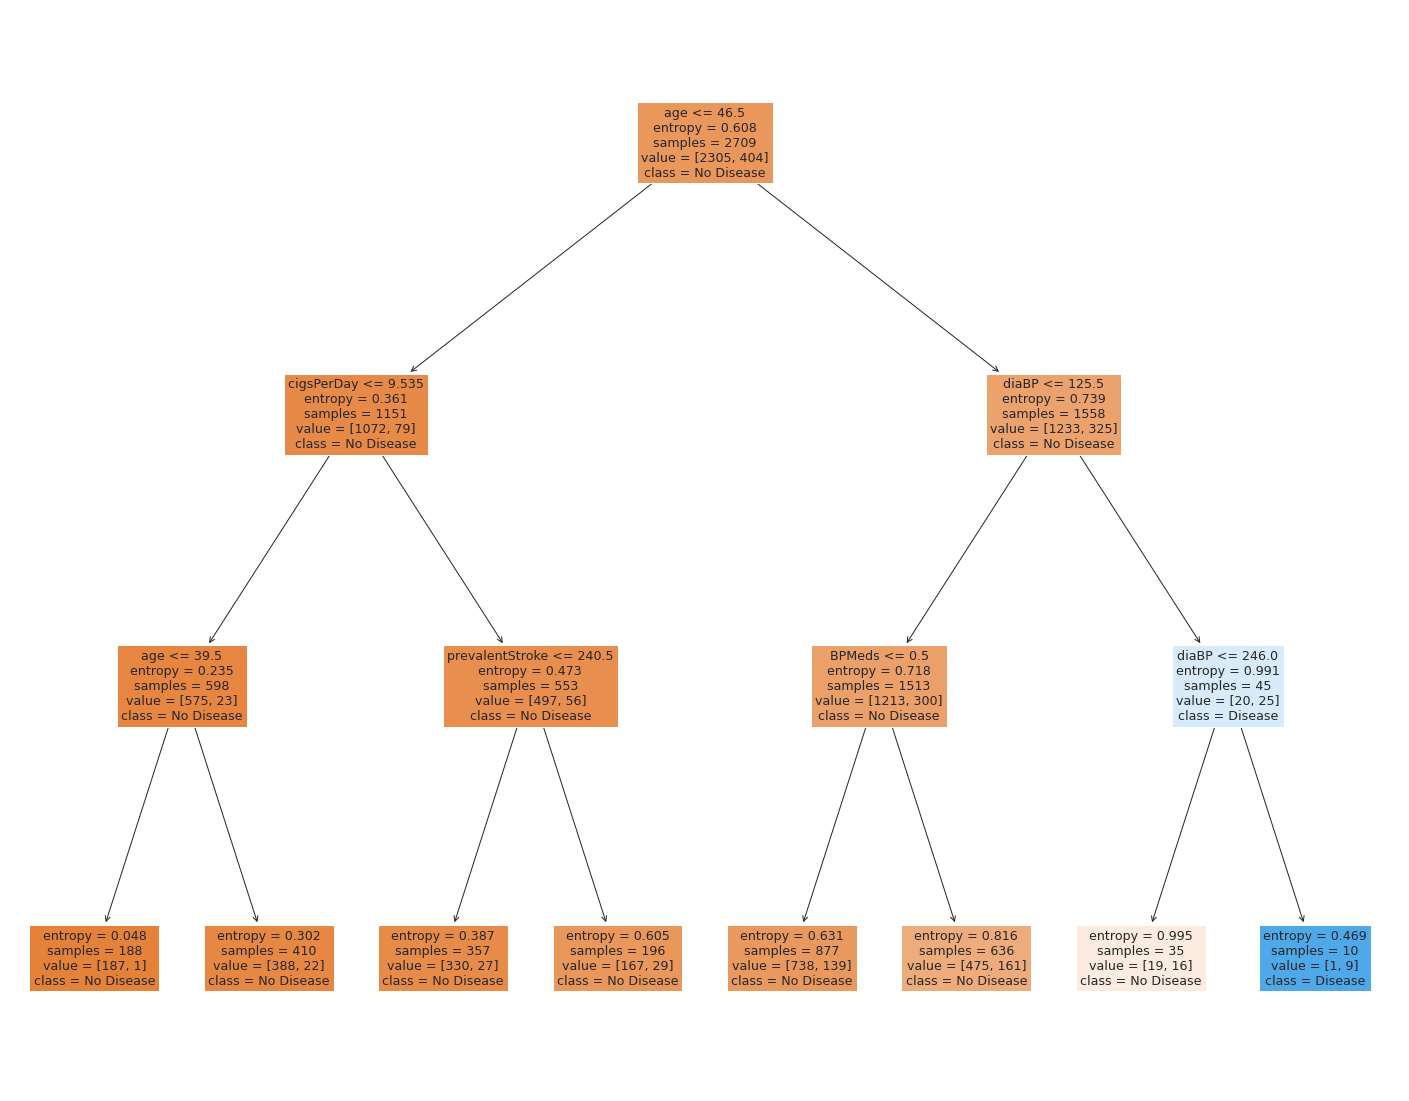

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

**GridSearch over Decision Tree with Hyper-parameter tuning**

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20,100],
    'min_samples_leaf': [5, 10, 20, 50,70, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: user 641 ms, sys: 45.5 ms, total: 687 ms
Wall time: 5.65 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 70, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters:-",grid_search.best_params_)

Best parameters:- {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}


In [ ]:
dt_with_hyper = DecisionTreeClassifier(criterion ='gini', max_depth= 3, min_samples_leaf= 50)
dt_with_hyper.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50)

In [ ]:
dt_with_hyper_predicted = dt_with_hyper.predict(X_test)
dt_with_hyper_conf_matrix = confusion_matrix(y_test, dt_with_hyper_predicted)
dt_with_hyper_acc_score = accuracy_score(y_test, dt_with_hyper_predicted)
#Recall
dt_with_hyper_acc_score(y_test, dt_with_hyper_predict)
#F1 Score
dt_with_hyper_acc_score=f1_score(y_test,dt_with_predict)

print("confussion matrix")
print(dt_with_hyper_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_with_hyper_acc_score*100,'\n')
print(classification_report(y_test,dt_with_hyper_predicted))

NameError: ignored

#Algorithms based on Bagging and Boosting

### **Random Forest Classifier**

A Random Forest is a reliable ensemble of multiple Decision Trees (or CARTs); though more popular for classification, than regression applications. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling of records with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data.

However, the algorithm does not work well for datasets having a lot of outliers, something which needs addressing prior to the model building.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

TypeError: ignored

In [ ]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(X_train,y_train)
print("Accuracy on training set is : {}".format(rf_hyper.score(X_train,y_train)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(X_test, y_test)))
rf_predicted = rf_hyper.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(y_test, rf_predicted))

Accuracy on training set is : 0.8813976377952756
Accuracy on validation set is : 0.8501845018450185
Accuracy of Hyper-tuned Random Forest Classifier: 85.01845018450184 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1148
           1       0.83      0.02      0.05       207

    accuracy                           0.85      1355
   macro avg       0.84      0.51      0.48      1355
weighted avg       0.85      0.85      0.79      1355



#**XGBoost**

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8480825958702065

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)



Best score: 0.6945279421134929
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 1, 'learning_rate': 0.01, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 5}


0.7219645973572675

In [ ]:

gs2.score(X_test,y_test)
gs2_predicted = gs2.predict(X_test)
gs2_acc_score = accuracy_score(y_test, gs2_predicted)
gs2_acc_score

0.8466076696165191

## **Model Comparison**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','logisticWith tunning',
                                   "knn","Knn with tunning",
                                   "Decision Tree",'Decision Tree with tunning',
                                   "Random Forest"],
                          'Accuracy':[lr_acc_score*100,lr_hy_acc_score*100,knn_acc*100,knn_hy_acc*100,dt_acc_score*100,dt_hyper_acc_score*100,rf_acc_score*100], 
                                                                                      
                         "Recall":[lr_re_score,lr_hy_re_score,knn_re_score,knn_hy_re_score,dt_re_score,dt_hyper_re_score,rf_re_score],
                         "F1_Score":[lr_f1_score,lr_hy_f1_score,knn_f1_score,knn_hy_f1_score,dt_f1_score,dt_hyper_f1_score,rf_f1_score]})
model_ev